In [1]:
%matplotlib widget

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from PfyMU.gait.train_classifier.core import load_datasets
from PfyMU.features import *

In [3]:
steps = {
    'jumping-rope': 0.15,
    'stairs-descending': 0.1,
    'stairs-ascending': 0.1,
    'jumping': 0.15,
    'lying': 0.15,
    'elevator-ascending': 0.15,
    'elevator-descending': 0.15,
    'running': 0.075,
    'sweeping': 0.15,
    'standing': 225,
    'running-treadmill': 0.1,
    'cycling-50W': 0.12,
    'cycling-100W': 0.12,
    'walking-left': 0.2,
    'walking-right': 0.2,
    'walking-impaired': 0.2,
    'walking': 0.25,
    'sitting': 400,
    'default': 0.5
}

In [4]:
# gait_sets_path = Path('/Users/adamol/Documents/Datasets/gait/processed')
gait_sets_path = Path('/home/lukasadamowicz/Documents/Datasets/processed')

datasets = [
    gait_sets_path / 'bluesky2',
    gait_sets_path / 'daliac',
    gait_sets_path / 'ltmm',
    gait_sets_path / 'usc-had'
]

X, Y, subjects, activities = load_datasets(
    datasets, 
    goal_fs=50.0, 
    acc_mag=True, 
    window_length=3.0, 
    window_step=steps
)

In [5]:
# make stair-climbing in the positive class
mask = (activities == 'stairs-ascending') | (activities == 'stairs-descending')
Y_inc_str = Y.copy()
Y_inc_str[mask] = 1

# Feature Generation

In [6]:
FB = Bank(window_length=None, window_step=None)

# add features
FB + Mean()
FB + MeanCrossRate()
FB + StdDev()
FB + Skewness()
FB + Kurtosis()
FB + Range()
FB + IQR()
FB + RMS()
FB + LinearSlope()
FB + SignalEntropy()
FB + SPARC()
FB + ComplexityInvariantDistance(normalize=True)
FB + JerkMetric(normalize=True)
FB + DimensionlessJerk(log=True, signal_type='acceleration')

FB + Autocorrelation(lag=1, normalize=True)
FB + Autocorrelation(lag=15, normalize=True)
FB + Autocorrelation(lag=14, normalize=True)
FB + Autocorrelation(lag=12, normalize=True)

FB + SampleEntropy(m=4, r=1.0)
FB + SampleEntropy(m=2, r=0.75)
FB + SampleEntropy(m=3, r=0.75)
FB + SampleEntropy(m=2, r=0.5)
FB + SampleEntropy(m=2, r=0.25)

FB + PermutationEntropy(order=3, delay=1, normalize=True)
FB + PermutationEntropy(order=5, delay=1, normalize=True)
FB + PermutationEntropy(order=8, delay=1, normalize=True)
FB + PermutationEntropy(order=10, delay=1, normalize=True)
FB + PermutationEntropy(order=8, delay=2, normalize=True)
FB + PermutationEntropy(order=8, delay=8, normalize=True)

FB + RangeCountPercentage(range_min=0, range_max=1.0)
FB + RangeCountPercentage(range_min=0.5, range_max=1.4)
FB + RangeCountPercentage(range_min=0.3, range_max=1.4)
FB + RangeCountPercentage(range_min=1, range_max=1.4)
FB + RangeCountPercentage(range_min=0, range_max=1.5)

FB + RatioBeyondRSigma(r=1.0)
FB + RatioBeyondRSigma(r=2.5)
FB + RatioBeyondRSigma(r=0.5)

FB + DominantFrequency(low_cutoff=0.25, high_cutoff=5.0)
FB + DominantFrequency(low_cutoff=1.0, high_cutoff=3.5)
FB + DominantFrequency(low_cutoff=1.0, high_cutoff=3.0)
FB + DominantFrequency(low_cutoff=1.5, high_cutoff=6.0)
FB + DominantFrequency(low_cutoff=0.5, high_cutoff=3.0)

FB + DominantFrequencyValue(low_cutoff=0.25, high_cutoff=5.0)
FB + DominantFrequencyValue(low_cutoff=1.0, high_cutoff=3.5)
FB + DominantFrequencyValue(low_cutoff=1.0, high_cutoff=3.0)
FB + DominantFrequencyValue(low_cutoff=1.5, high_cutoff=6.0)
FB + DominantFrequencyValue(low_cutoff=0.5, high_cutoff=3.0)

FB + PowerSpectralSum(low_cutoff=0.25, high_cutoff=5.0)
FB + PowerSpectralSum(low_cutoff=1.0, high_cutoff=3.0)
FB + PowerSpectralSum(low_cutoff=1.5, high_cutoff=3.5)
FB + PowerSpectralSum(low_cutoff=0.25, high_cutoff=4.0)
FB + PowerSpectralSum(low_cutoff=0.25, high_cutoff=3.0)

FB + SpectralFlatness(low_cutoff=0.25, high_cutoff=5.0)
FB + SpectralFlatness(low_cutoff=0.0, high_cutoff=6.0)
FB + SpectralFlatness(low_cutoff=0.0, high_cutoff=8.0)
FB + SpectralFlatness(low_cutoff=0.0, high_cutoff=3.5)
FB + SpectralFlatness(low_cutoff=0.5, high_cutoff=3.5)

FB + SpectralEntropy(low_cutoff=0.25, high_cutoff=5.0)
FB + SpectralEntropy(low_cutoff=0.0, high_cutoff=5.0)
FB + SpectralEntropy(low_cutoff=0.0, high_cutoff=3.5)
FB + SpectralEntropy(low_cutoff=0.25, high_cutoff=3.0)
FB + SpectralEntropy(low_cutoff=1.5, high_cutoff=4.0)

FB + DetailPower(wavelet='coif4', freq_band=[1.0, 3.0])

FB + DetailPowerRatio(wavelet='coif4', freq_band=[1.0, 3.0])

In [7]:
X_feat, feature_names = FB.compute(X, fs=50.0, windowed=True, columns=[''])

/home/lukasadamowicz/miniconda3/envs/pfymu/lib/python3.8/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [8]:
feats = pd.DataFrame(
    index=range(X_feat.shape[0]), 
#     columns=['Subject', 'Activity', 'Label'] + feature_names,
    columns=['Label'] + feature_names,
    dtype='float'
)
# feats['Subject'] = feats.Subject.astype('str')
# feats['Activity'] = feats.Activity.astype('str')

feats.iloc[:, 1:] = X_feat
feats['Label'] = Y
feats['Label'] = feats.Label.astype('int')
# feats['Subject'] = subjects
# feats['Activity'] = activities

In [9]:
feats_istr = pd.DataFrame(
    index=range(X_feat.shape[0]), 
    columns=['Label'] + feature_names,
    dtype='float'
)

feats_istr.iloc[:, 1:] = X_feat
feats_istr['Label'] = Y_inc_str
feats_istr['Label'] = feats_istr.Label.astype('int')

### Predictive Power Score

In [10]:
import ppscore

In [28]:
pps = pd.DataFrame()

## Stairs as negative class

In [29]:
df_predictors = ppscore.predictors(feats, 'Label', output='df').sort_values('ppscore', ascending=False, ignore_index=True)
df_predictors['excl_rank'] = df_predictors.index.values

pps = pps.append(df_predictors.loc[:, ['x', 'ppscore', 'excl_rank']].rename({'ppscore': 'excl_ppscore'}, axis=1), ignore_index=True)

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df_predictors, x="x", y="ppscore")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [27]:
for col in feats.columns:
    if feats[col].unique().size < 16:
        if col != 'Label':
            feats[col] += np.random.rand(feats.shape[0]) * 1e-8

In [28]:
pps_matrix = ppscore.matrix(feats, output='df')

In [29]:
plt.figure(figsize=(40, 27))
sns.heatmap(pps_matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.tight_layout()
# plt.savefig('PPScore_full_matrix.pdf')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Stairs as positive class

In [30]:
df_predictors = ppscore.predictors(feats_istr, 'Label', output='df').sort_values('ppscore', ascending=False, ignore_index=True)
df_predictors['incl_rank'] = df_predictors.index.values

pps = pps.merge(df_predictors.loc[:, ['x', 'ppscore', 'incl_rank']].rename({'ppscore': 'incl_ppscore'}, axis=1), on='x')

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df_predictors, x="x", y="ppscore")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [12]:
for col in feats_istr.columns:
    if feats_istr[col].unique().size < 16:
        if col != 'Label':
            feats_istr[col] += np.random.rand(feats.shape[0]) * 1e-8

In [13]:
pps_matrix = ppscore.matrix(feats_istr, output='df')

In [16]:
plt.figure(figsize=(40, 27))
sns.heatmap(pps_matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.tight_layout()
# plt.savefig('PPScore_full_matrix_incl_stairs.pdf')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [14]:
import matplotlib.lines as mlines

In [39]:
f, ax = plt.subplots(figsize=(8, 12))

# vertical lines
ax.axvline(x=1, color='k', alpha=0.7, linewidth=1, linestyle=':')
ax.axvline(x=3, color='k', alpha=0.7, linewidth=1, linestyle=':')

n = pps.shape[0]

for _, stuff in pps.iterrows():
    ft, p1, r1, p2, r2 = stuff
    _l = mlines.Line2D([1, 3], [n-r1, n-r2], color='r' if r1 < r2 else 'g', marker='o', markersize=6)
    ax.add_line(_l)
    # text
    ax.text(1-0.05, n-r1, f'{ft}, {p1:.2f}', ha='right', va='center', fontsize=8)
    ax.text(3+0.05, n-r2, f'{ft}, {p2:.2f}', ha='left', va='center', fontsize=8)

# decoration
ax.set_title('PPScore rank excl. and incl. stairs as positive class')
ax.set_xlim(-1, 4)
ax.set_ylim(-0.5, pps.shape[0] + 0.5)
ax.set_xticks([1, 3])
ax.set_xticklabels(['Excl. Stairs', 'Incl. Stairs'])
ax.set_yticks(np.arange(n % 5, n+1, 5))
ax.set_yticklabels(np.arange(0, n, 5)[::-1])

# Lighten borders
ax.spines["top"].set_alpha(.0)
ax.spines["bottom"].set_alpha(.0)
ax.spines["right"].set_alpha(.0)
ax.spines["left"].set_alpha(.0)

f.tight_layout()

# f.savefig('ppscore_rank_slopeplot.png')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [16]:
import plotly.graph_objects as go

In [50]:
mp_feats = [
    'Autocorrelation',
    'SampleEntropy',
    'PermutationEntropy',
    'RangeCountPercentage',
    'RatioBeyondRSigma',
    'DominantFrequency',
    'DominantFrequencyValue',
    'PowerSpectralSum',
    'SpectralFlatness',
    'SpectralEntropy'
]

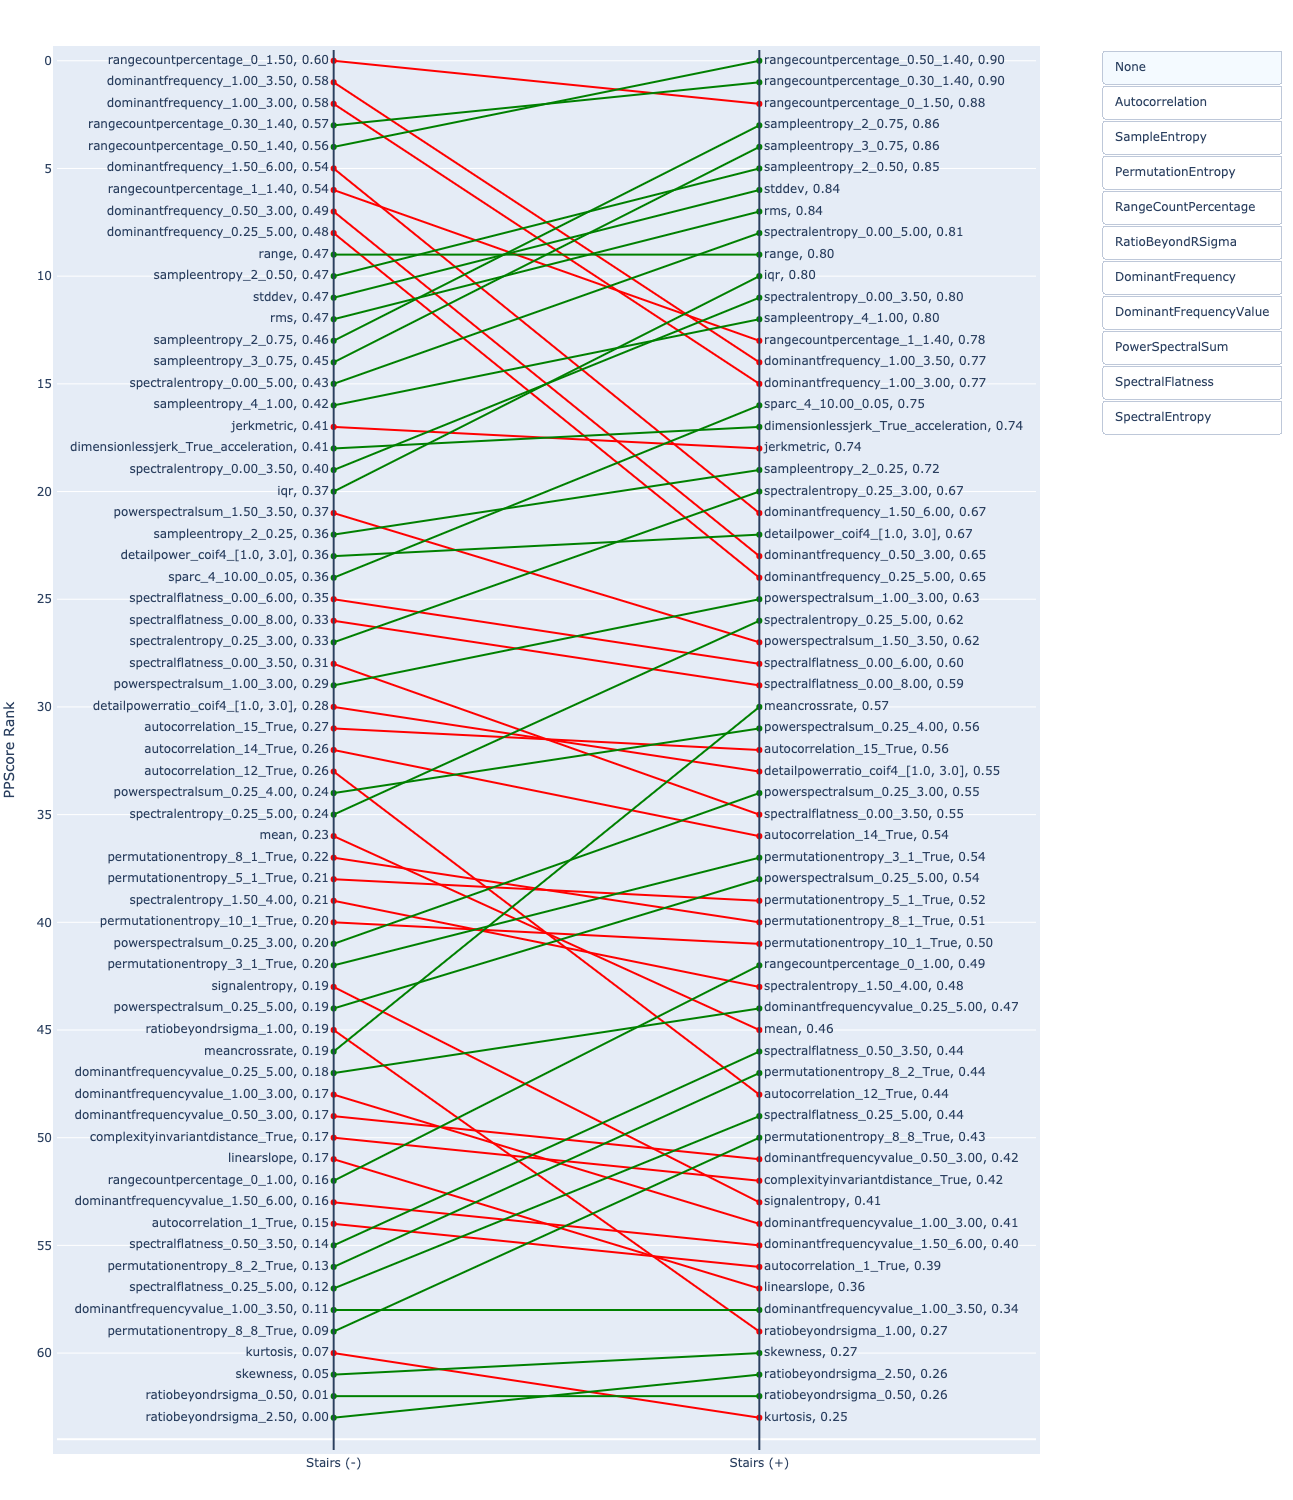

In [94]:
fig = go.Figure()

n = pps.shape[0]
clrs = []

for _, stuff in pps.iterrows():
    ft, p1, r1, p2, r2 = stuff
    
    clrs.append('red' if r1 < r2 else 'green')
    
    fig.add_trace(go.Scatter(
        x=[0, 1], y=[n-r1, n-r2],
        mode='lines+markers+text',
        text=[f'{ft}, {p1:.2f}', f'{ft}, {p2:.2f}'], 
        textposition=['middle left', 'middle right'],
        line={'color': clrs[-1]},
        hoverinfo='none'
    ))

fig.add_shape(type='line', x0=0, x1=0, y0=0, y1=1, xref='x', yref='paper')
fig.add_shape(type='line', x0=1, x1=1, y0=0, y1=1, xref='x', yref='paper')

fig.update_xaxes(range=[-0.65, 1.65], tickvals=[0, 1], ticktext=['Stairs (-)', 'Stairs (+)'])
fig.update_yaxes(
    title_text='PPScore Rank',
    range=[-0.5, n + 0.5], 
    tickvals=np.arange(n % 5, n + 1, 5), 
    ticktext=np.arange(0, n, 5)[::-1])

fig.update_layout(
    showlegend=False,
    autosize=False,
    width=1100,
    height=1500,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    )
)

buttons = [
    dict(args=['opacity', 1], label='None', method='restyle')
]
for mpf in mp_feats:
    buttons.append({
        'label': mpf,
        'method': 'restyle',
        'args': [
            {'opacity': [1 if mpf.lower() in i else 0.3 for i in pps.x]}
        ]
    })



fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="down",
            active=0,
            x=1.25,
            y=1,
            buttons=buttons
            )
    ])

fig.write_html("ppscore_rank_slopeplot.html")

fig.show()